In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

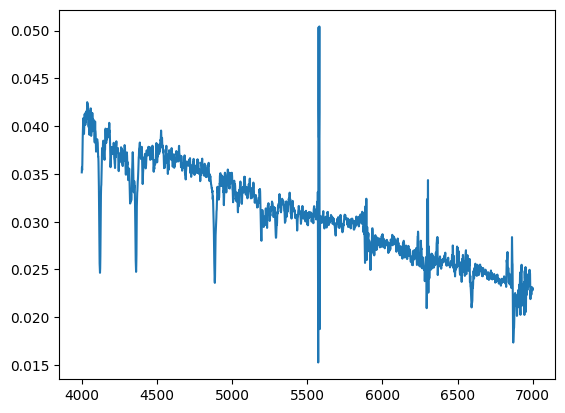

In [3]:
#open the file
spec = fits.open('C:/Users/user/Downloads/HoS5/Env_Qtime_Task2/Spec_N4330_region2 (1).fits')
specflx = spec[0].data
specerr = spec[1].data
specwav = spec[2].data
#plot the spectrum 2
plt.figure()
plt.plot(specwav,specflx)
plt.show()

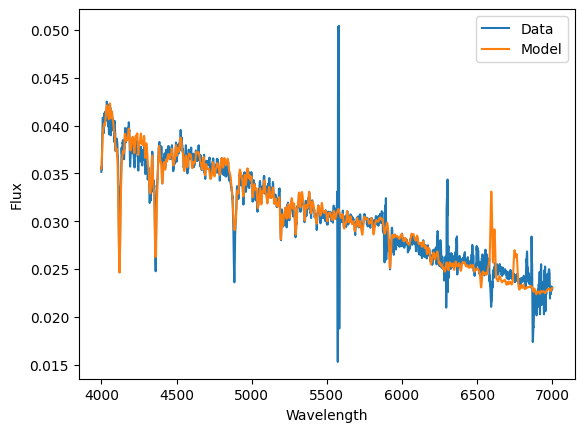

1.0037316285610607e+20
0.03068781067439252
3.057372090424833e-22


In [36]:
modhdu = fits.open('C:/Users/user/Downloads/HoS5/Env_Qtime_Task2/Models_N4330_region2 (1).fits')
Next = modhdu[0].header['NEXT']  
modwave = modhdu[0].data.flatten()  
modflux = modhdu[1].data.flatten()

A= (np.mean(specflx)/np.mean(modflux))

plt.plot(specwav, specflx)
plt.plot(modwave, A*modflux)
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.legend(['Data', 'Model'])
plt.show()

print(A)
print(np.mean(specflx))
print(np.mean(modflux))


In [50]:
modhdu = fits.open('C:/Users/user/Downloads/HoS5/Env_Qtime_Task2/Models_N4330_region2 (1).fits')
#How many extensions
Next = modhdu[0].header['NEXT']
modwave = modhdu[0].data

mean_flux = np.mean(specflx)

chi2 = np.zeros(Next)

for ext in np.arange(1,Next+1):
    thisext = modhdu[ext]
    thishead = thisext.header
    modspec = thisext.data
    Qtau = thishead['TRUNCTAU']
    Qage = thishead['TRUNCAGE']
    photarr = np.array((thishead['MODFUV'],thishead['MODNUV'],
    thishead['MODU'],thishead['MODG'],
    thishead['MODI'],thishead['MODZ'], 
    thishead['MODIR1'],thishead['MODIR4']))

    mean_mod = np.mean(modspec.flatten())

    const = mean_flux/mean_mod
    modspec2 = modspec*const
    
    chi2[ext-1] = np.sum((specflx-modspec2)**2/specerr**2)

print(chi2)
print(chi2.argmin())



[ 4319.31260555  2506.61301217  2324.68719727  2334.27814147
  2352.05826544  2373.93246378  2420.26073344  2499.54832708
  2620.89097466  3003.44652096  3394.19628465 17763.11294392
  7709.26914449  4149.26571659  2912.85419202  2499.3213076
  2347.99803812  2399.35541438  2476.57089447  2590.54419765
  2967.24782578  3361.76275948 34055.73620331 18389.81970238
 10181.69700497  6058.92095987  4053.39404058  2670.05497106
  2381.24846868  2450.14251875  2559.38588709  2929.04042391
  3327.04270238 46711.32556211 29811.5804428  18904.28170423
 12093.75313613  7961.94355019  4103.49971202  2500.73375931
  2433.28845573  2528.24485223  2888.81926397  3289.6356712
 55895.13075608 39529.43440536 27700.54273205 19337.27253643
 13549.64100604  7009.92012331  3054.81570415  2495.3903462
  2508.84870783  2847.14748394  3249.38222813 62242.25451442
 46911.22912892 35121.96466823 26176.06136588 19483.63842591
 10954.64087475  4333.8872916   2812.40404015  2559.4256418
  2806.95888603  3205.181050

In [64]:
best_idx = chi2.argmin() + 1
best_ext = modhdu[best_idx]
best_Qage = best_ext.header['TRUNCAGE']
best_Qtau = best_ext.header['TRUNCTAU']

print(best_Qage, best_Qtau)
print(chi2.min()/len(specflx))

100 20
0.9686196655281257


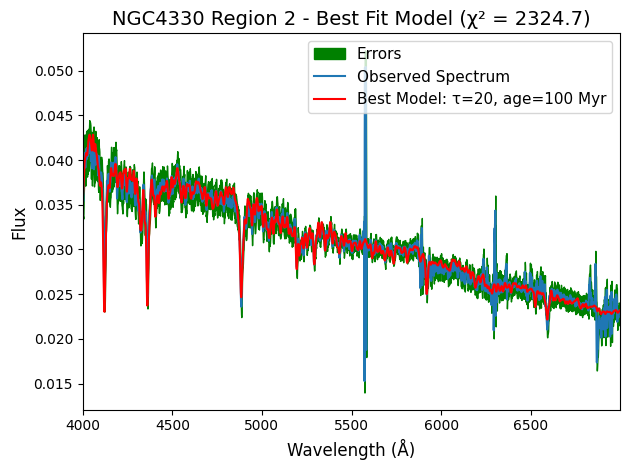

  Extension index: 3
  Reduced χ²: 0.969


In [66]:

best_head = best_ext.header
best_modspec = best_ext.data.flatten()  # Flatten to 1D

mean_flux = np.mean(specflx)
mean_mod = np.mean(best_modspec)
const = mean_flux / mean_mod
best_modspec_scaled = best_modspec * const

modwave_flat = modwave.flatten()

plt.fill_between(specwav, specflx - specerr, specflx + specerr, 
                 color='green', label='Errors')
plt.plot(specwav, specflx, label='Observed Spectrum')

# Plot best-fit model
plt.plot(modwave_flat, best_modspec_scaled, 'r-', lw=1.5, 
         label=f'Best Model: τ={best_Qtau}, age={best_Qage} Myr')

plt.xlabel('Wavelength (Å)', fontsize=12)
plt.ylabel('Flux', fontsize=12)
plt.title(f'NGC4330 Region 2 - Best Fit Model (χ² = {chi2.min():.1f})', fontsize=14)
plt.legend(loc='upper right', fontsize=11)
plt.xlim(specwav.min(), specwav.max())
plt.tight_layout()
plt.show()

print(f"  Extension index: {best_idx}")
print(f"  Reduced χ²: {chi2.min() / len(specflx):.3f}")